In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from src.utils.getit import get_project_root
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
from image_slicer import slice
import dotenv


PROJECT_DIR = get_project_root()
DATA_DIR = os.path.join(PROJECT_DIR,"data/external/deepglobe/")
SLICED_MASK_DIR= os.path.join(DATA_DIR,"interm/groundtruth/")
SLICED_IMAGE_DIR= os.path.join(DATA_DIR,"interm/images/")
PROCESSED_MASK_DIR= os.path.join(DATA_DIR,"processed/groundtruth/")
PROCESSED_IMAGE_DIR= os.path.join(DATA_DIR,"processed/images/")
RAW_DATA= os.path.join(PROJECT_DIR,"data/raw/training/groundtruth/")

dotenv_path = os.path.join(PROJECT_DIR, '.env')
dotenv.load_dotenv(dotenv_path)
api = KaggleApi()
api.authenticate()

In [4]:
# api.dataset_download_files('balraj98/deepglobe-road-extraction-dataset',path=DATA_DIR)
z = zipfile.ZipFile(file=os.path.join(DATA_DIR,'raw/deepglobe-road-extraction-dataset.zip'))
z.extractall(path=DATA_DIR)

In [5]:
filenames= list(sorted(os.listdir(os.path.join(DATA_DIR,'raw/train/'))))
mask_filenames = filenames[::2]
image_filenames= filenames[1::2]
mask = cv2.imread(os.path.join(PROCESSED_MASK_DIR, mask_filenames[12]), cv2.IMREAD_UNCHANGED,
)
plt.imshow(mask)

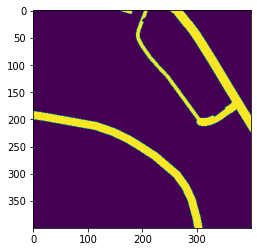

In [22]:
#Read all file names from ./data/external/raw
mask_filenames = list(sorted(os.listdir(RAW_DATA)))
image_filenames=list(sorted(os.listdir(RAW_DATA)))
mask = cv2.imread(os.path.join(RAW_DATA, mask_filenames[30]), cv2.IMREAD_UNCHANGED,
)
plt.imshow(mask)

In [19]:
mask.max()

255

In [7]:
len(mask_filenames)

6226

In [9]:
hf_images=[]
hf_masks = []
for mask_fn,image_fn in tqdm(zip(mask_filenames,image_filenames)):
    mask = cv2.imread(os.path.join(MASK_DIR, mask_fn), cv2.IMREAD_UNCHANGED)
    if np.mean(mask)>25:
        hf_masks.append(mask_fn)
        hf_images.append(image_fn)

6226it [01:17, 80.61it/s]


In [11]:
len(hf_masks)

723

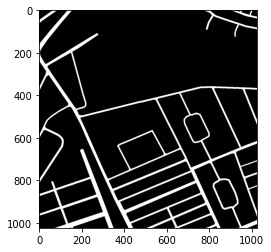

In [14]:
mask = cv2.imread(os.path.join(MASK_DIR, hf_masks[2]), cv2.IMREAD_UNCHANGED,
)
plt.imshow(mask)

In [17]:
number=4
for mask_fn,image_fn in tqdm(zip(hf_masks,hf_images)):
    slice(filename=IMAGE_DIR+image_fn,
          number_tiles=number,
          save=True,
          save_dir=SLICED_IMAGE_DIR)
    slice(filename=MASK_DIR+mask_fn,
          number_tiles=number,
          save=True,
          save_dir=SLICED_MASK_DIR)

723it [03:39,  3.29it/s]


In [18]:
#Read all file names from ./data/external/raw
sliced_mask_filenames = list(sorted(os.listdir(SLICED_MASK_DIR)))
sliced_image_filenames=list(sorted(os.listdir(SLICED_IMAGE_DIR)))

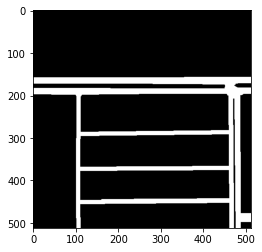

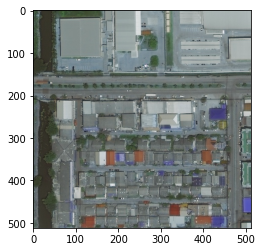

In [73]:
image = cv2.imread(os.path.join(SLICED_IMAGE_DIR, sliced_image_filenames[12]), cv2.IMREAD_UNCHANGED,
)
mask = cv2.imread(os.path.join(SLICED_MASK_DIR, sliced_mask_filenames[12]), cv2.IMREAD_UNCHANGED,
)
plt.imshow(mask)
plt.show()
plt.imshow(image)
plt.show()

In [76]:
len(sliced_image_filenames)

2892

In [75]:
hff_images=[]
hff_masks = []
for mask_fn,image_fn in tqdm(zip(sliced_mask_filenames,sliced_image_filenames)):
    mask = cv2.imread(os.path.join(SLICED_MASK_DIR, mask_fn), cv2.IMREAD_UNCHANGED)
    image = cv2.imread(os.path.join(SLICED_IMAGE_DIR, image_fn), cv2.IMREAD_UNCHANGED)
    if np.mean(mask)>15 and np.mean(image)>115:
        hff_masks.append(mask_fn)
        hff_images.append(image_fn)

2892it [00:34, 83.55it/s]


In [98]:
import random


5

In [77]:
len(hff_masks)

591

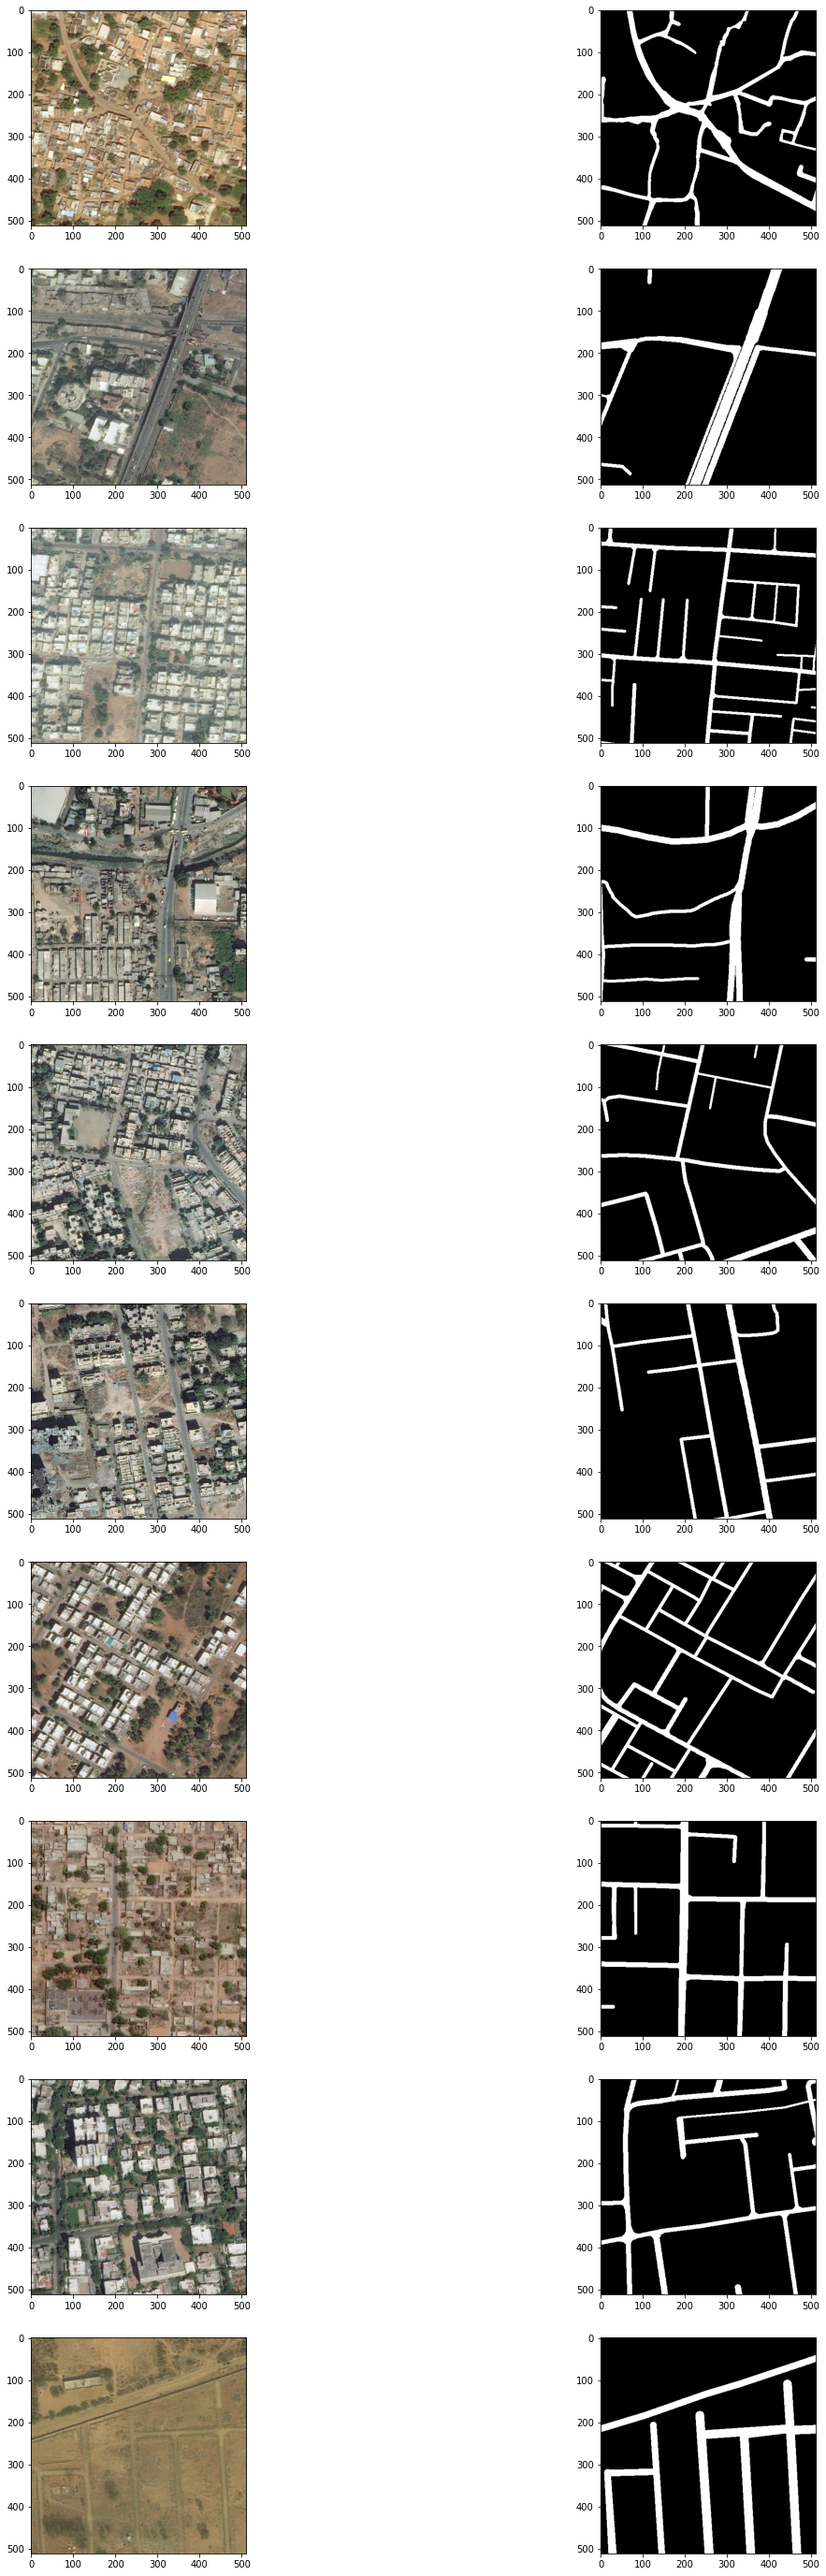

In [118]:
rows=10
cols = 2
fig,axs = plt.subplots(rows,cols,figsize=(20,50),tight_layout=False)
for r in range(rows):
    index=random.randint(0,len(hff_masks))
    image = cv2.imread(os.path.join(SLICED_IMAGE_DIR, hff_images[index]), cv2.IMREAD_UNCHANGED,
    )
    mask = cv2.imread(os.path.join(SLICED_MASK_DIR, hff_masks[index]), cv2.IMREAD_UNCHANGED,
    )
    axs[r,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[r,1].imshow(mask)
plt.show()